# Data Description

The task is to train and build a machine learning model which can predict the next-day maximum and minimum air temperatures forecast of the LDAPS model. The dataset consists of summer data from 2013 to 2017 & this data is for the purpose of bias correction. 

Attribute Information:
    
    1. station - used weather station number: 1 to 25
    2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    19. lat - Latitude (Â°): 37.456 to 37.645
    20. lon - Longitude (Â°): 126.826 to 127.135
    21. DEM - Elevation (m): 12.4 to 212.3
    22. Slope - Slope (Â°): 0.1 to 5.2
    23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

There are two target variables here: 
    
    1) Next_Tmax: Next day maximum temperature
    2) Next_Tmin: Next day  minimum temperature

# Importing the Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df=pd.read_csv(r'C:\Users\HP-15\Data Trained Projects\temperature.csv')
#Visualizing dataset
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.412500,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.178200,5893.608398,30.5,21.0


In the above Dataframe, we can see there are 7752 rows and 25 columns in total including two output variables. We have a Date column, hence we will make this column as our index as it has no relevance in achieving our Model's prediction. 

In [3]:
#Setting CustomerID as index
df.set_index('Date',inplace=True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
30-06-2013,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0
30-06-2013,7.0,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5849.233398,30.9,23.4
30-06-2013,8.0,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,5863.992188,31.1,22.9
30-06-2013,9.0,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,...,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.412500,5876.901367,31.3,21.6


Now we have 7752 rows and 24 columns in our dataset.

# Checking Null Values & Treating Them

In [4]:
#Checking Null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

From the above information, we can see that we have null values in almost all the columns. Hence, we will treat these columns using the Imputer Function.

In [5]:
#Importing Libraries to treat Null values
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings('ignore')
imp=Imputer(missing_values='NaN',strategy='median')

In [6]:
#treating null values using Imputer
for i in df.columns:
    if df[i].isnull().sum()!=0:
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [7]:
#Checking null values again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We now observe that our null values have been treated. Let's visualize and check if we still have any Null Values.

In [8]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

We cannot see any Null Values in our dataset. Hence, we can proceed forward with visualizing our data.

# Data Visualization

In [9]:
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

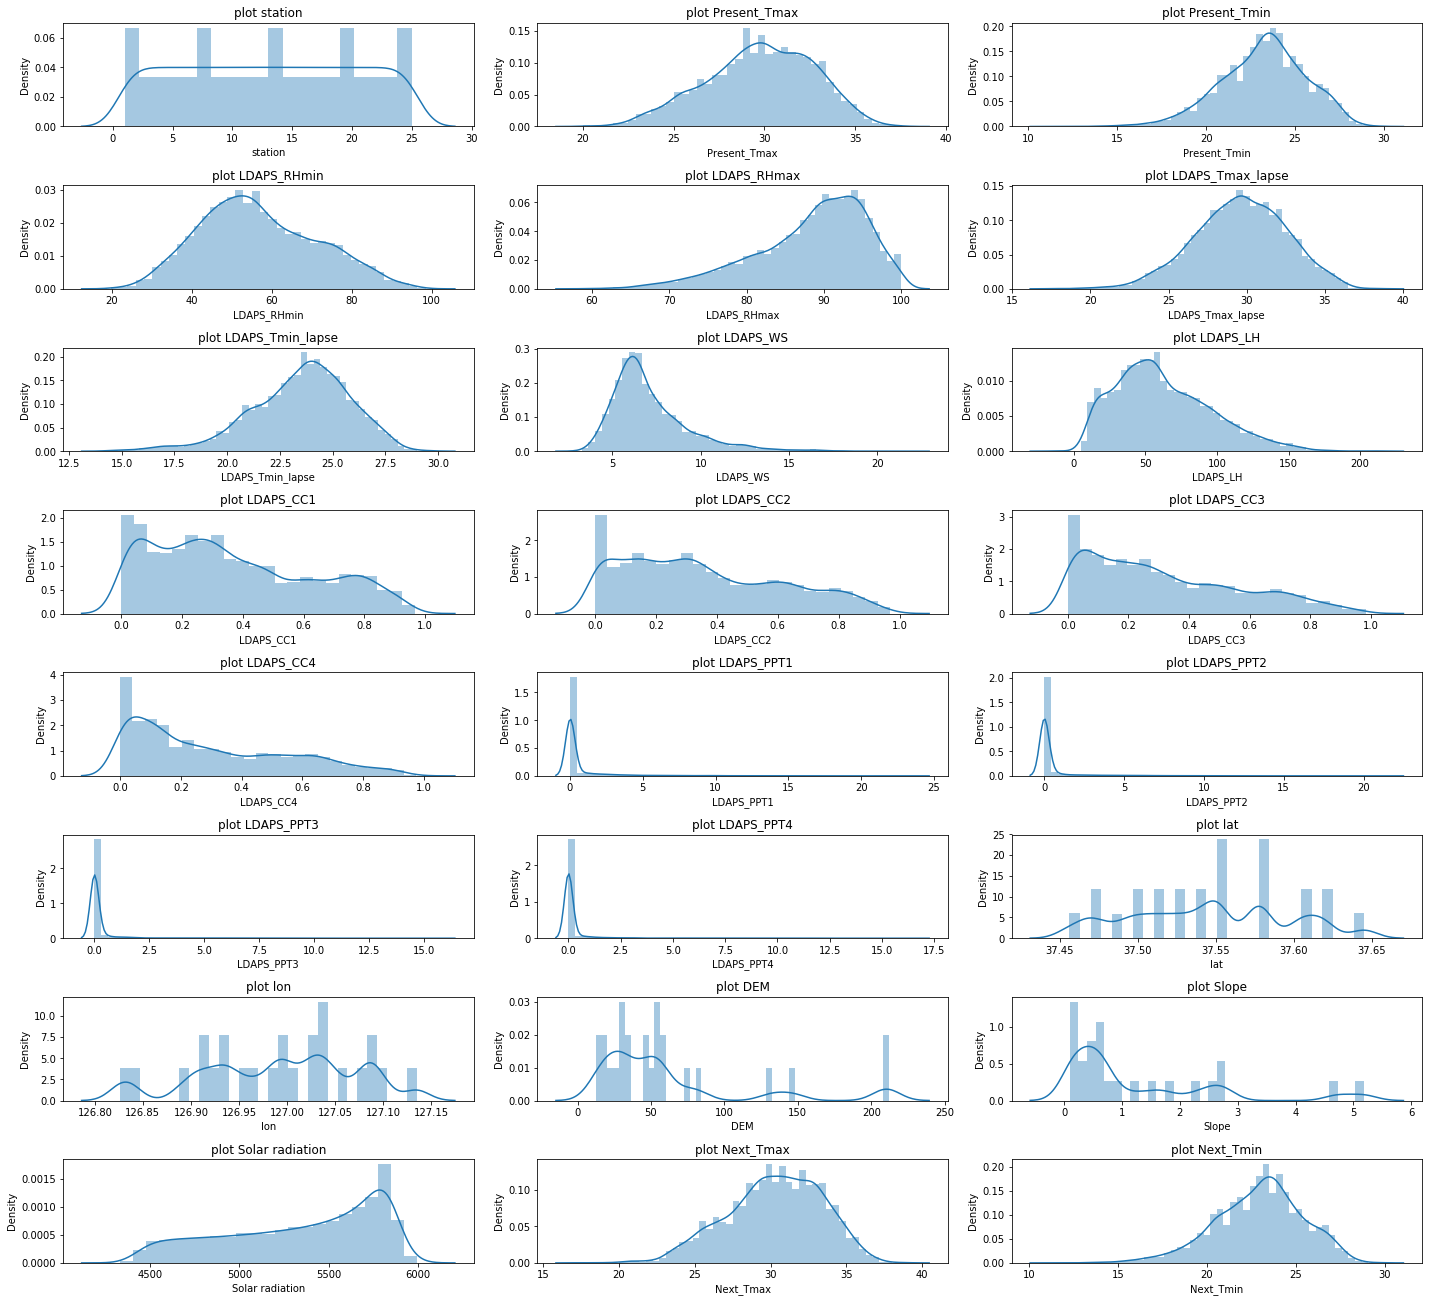

In [10]:
#Visualizing different columns using distplot
ncol,nrow=9,3
ab=df.columns.values
plt.figure(figsize=(20,20))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.distplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

Observations:

We can observe that the data is left skewed in columns LDAPS_RHmax,LDAPS_Tmin_lapse,Solar radiation,Next_Tmax & Next_Tmin.

We can observe right skewed data in columns LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 & LDAPS_CC4.

The data in column station is at a very constant rate.

The maximum values in columns LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 & LDAPS_PPT4 are at 0.

ValueError: cannot index with vector containing NA / NaN values

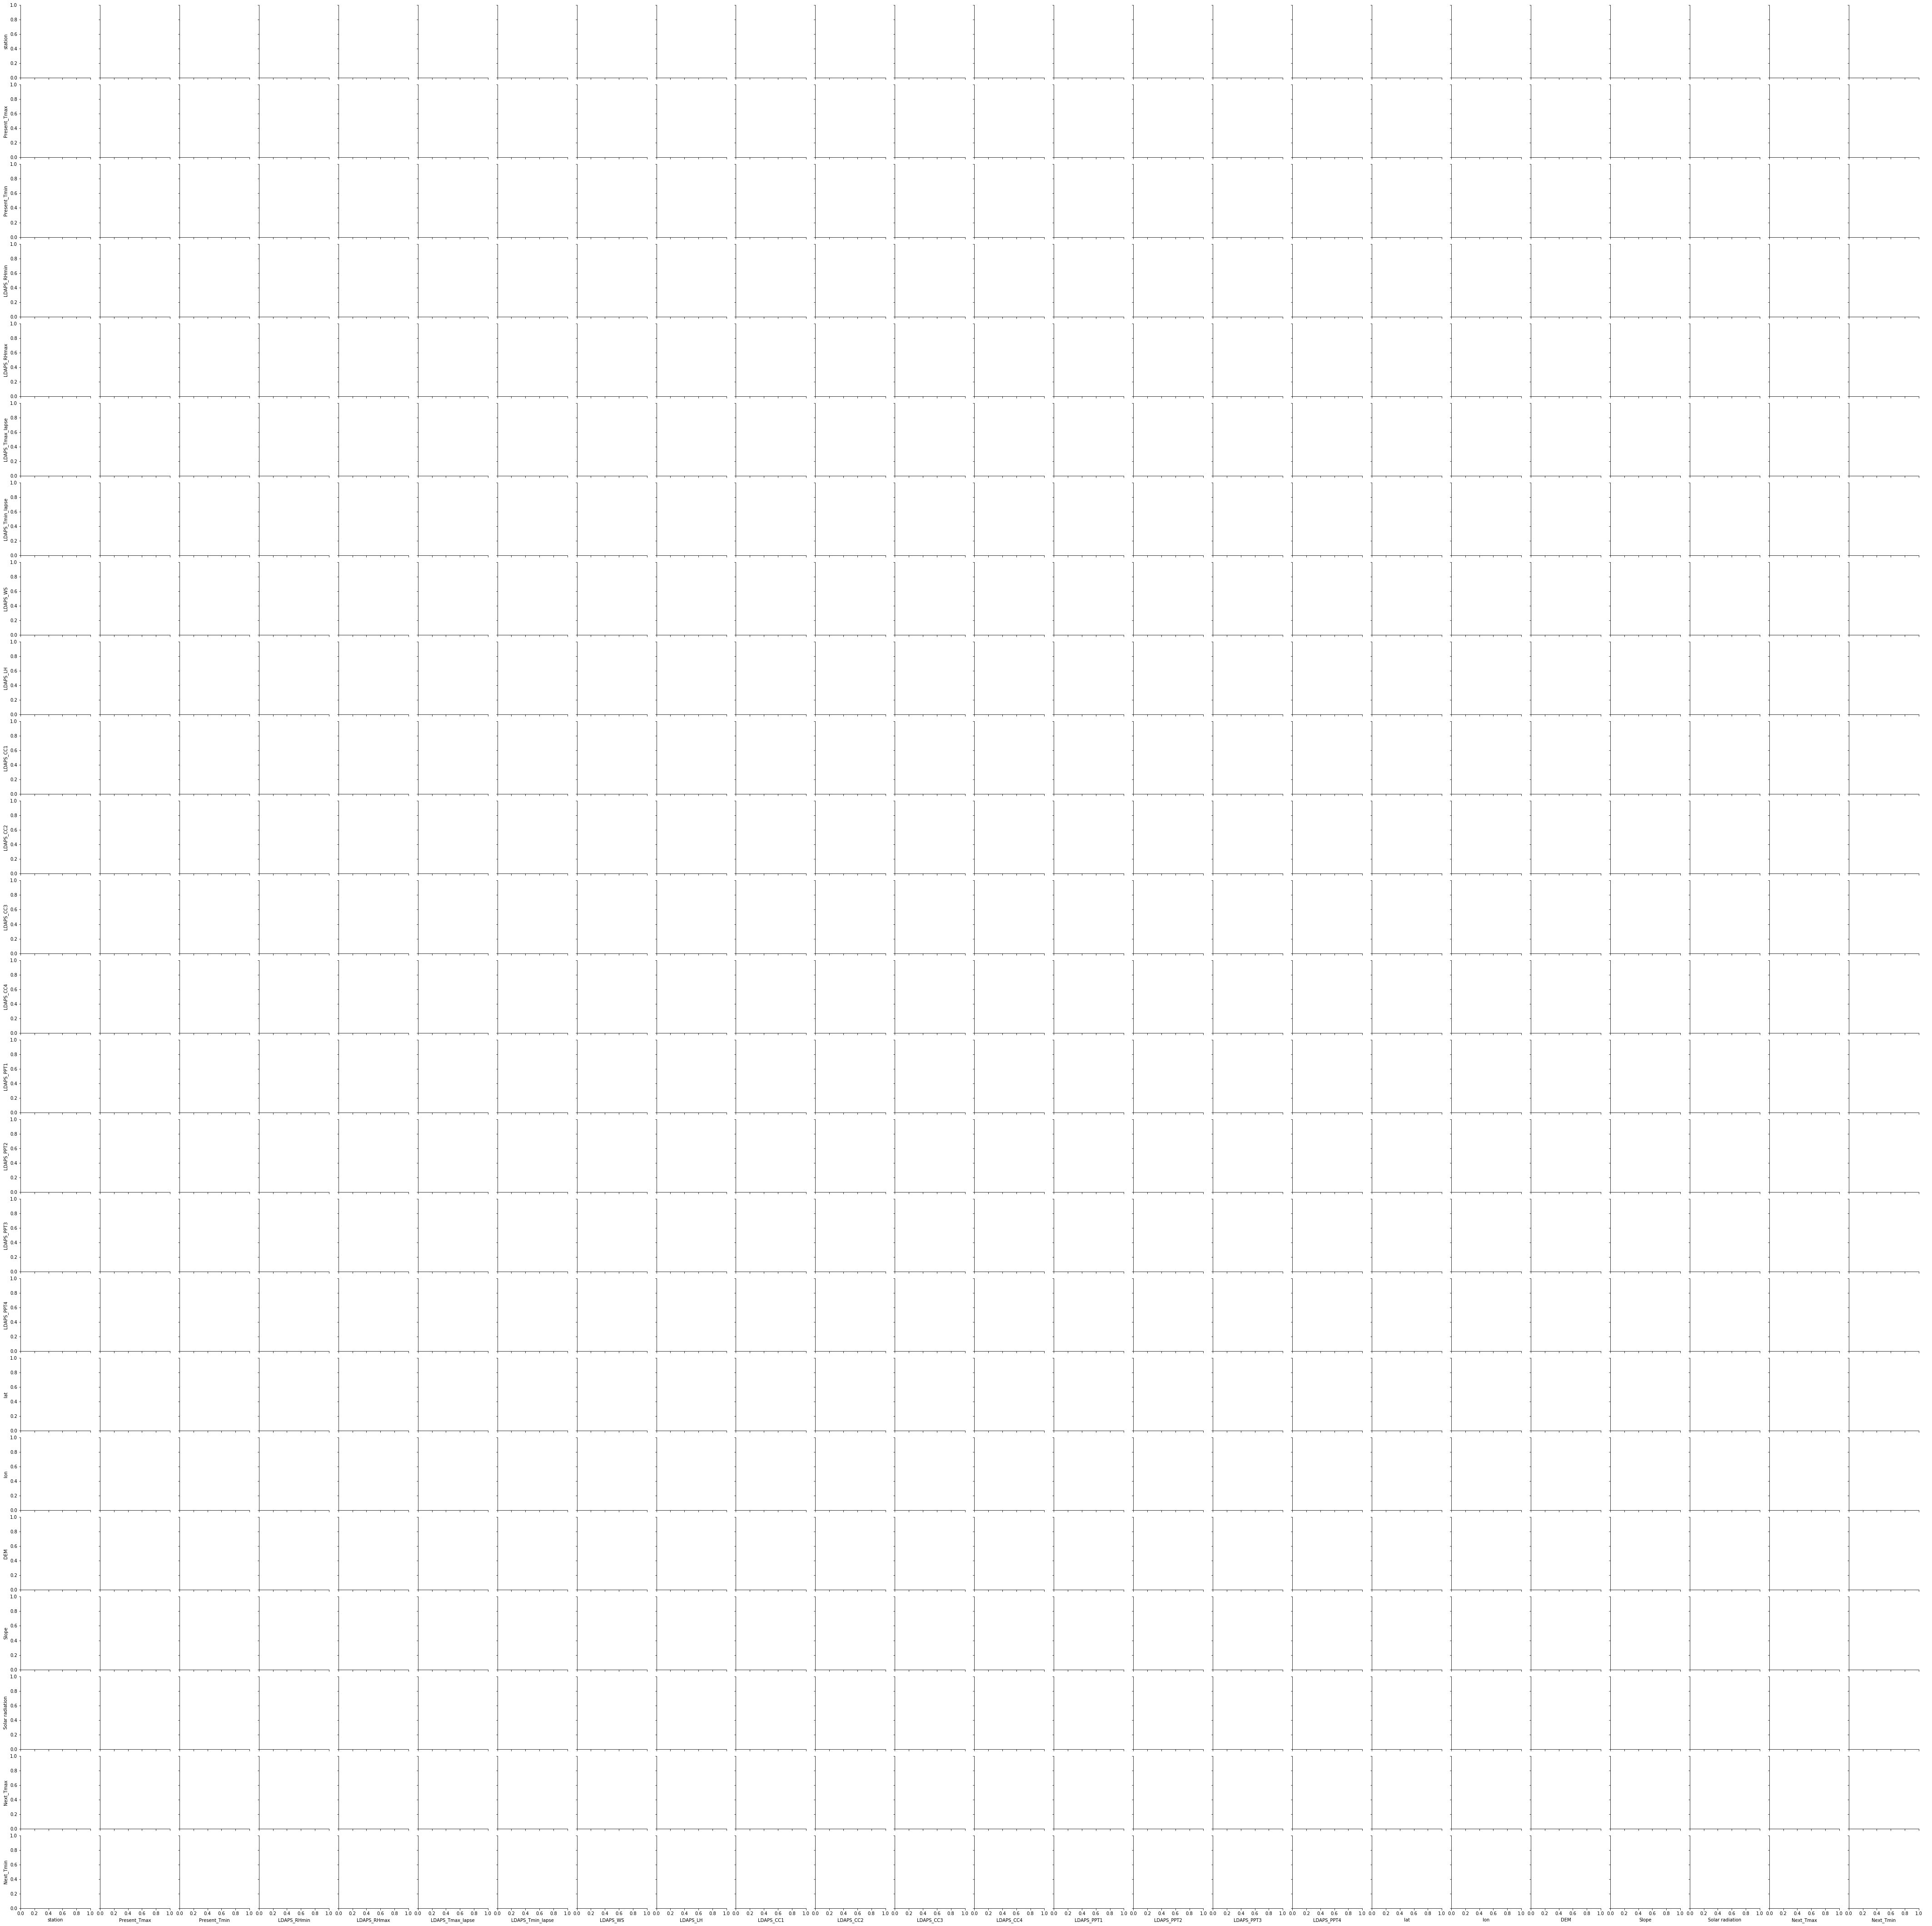

In [11]:
#Using multivariate analysis to visualize data
sns.pairplot(df)

Observations:
    
We can see positive correlations of some columns with both out Target Variables.

We cannot observe any negative correlations between the variables in our data.

We are unable to identify detailed relationship between the columns in the above pairplot due to huge number of columns.

Hence, we will try to find relationship with the help of heatmaps and by describing our data. But we can observe that the data is widely scattered.

# Describe Data

In [12]:
#Describing final columns present in dataset
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [13]:
#Defining Shape
df.shape

(7752, 24)

Our dataset consists of 7752 rows and 24 columns

In [14]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 30-06-2013 to nan
Data columns (total 24 columns):
station             7752 non-null float64
Present_Tmax        7752 non-null float64
Present_Tmin        7752 non-null float64
LDAPS_RHmin         7752 non-null float64
LDAPS_RHmax         7752 non-null float64
LDAPS_Tmax_lapse    7752 non-null float64
LDAPS_Tmin_lapse    7752 non-null float64
LDAPS_WS            7752 non-null float64
LDAPS_LH            7752 non-null float64
LDAPS_CC1           7752 non-null float64
LDAPS_CC2           7752 non-null float64
LDAPS_CC3           7752 non-null float64
LDAPS_CC4           7752 non-null float64
LDAPS_PPT1          7752 non-null float64
LDAPS_PPT2          7752 non-null float64
LDAPS_PPT3          7752 non-null float64
LDAPS_PPT4          7752 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope               7752 non-null float64
Solar ra

The dataset does not consist of any Null Values and all values are in float. Hence, we can describe our data for better understanding.

In [15]:
#Describing mean, median, min, max values of data
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


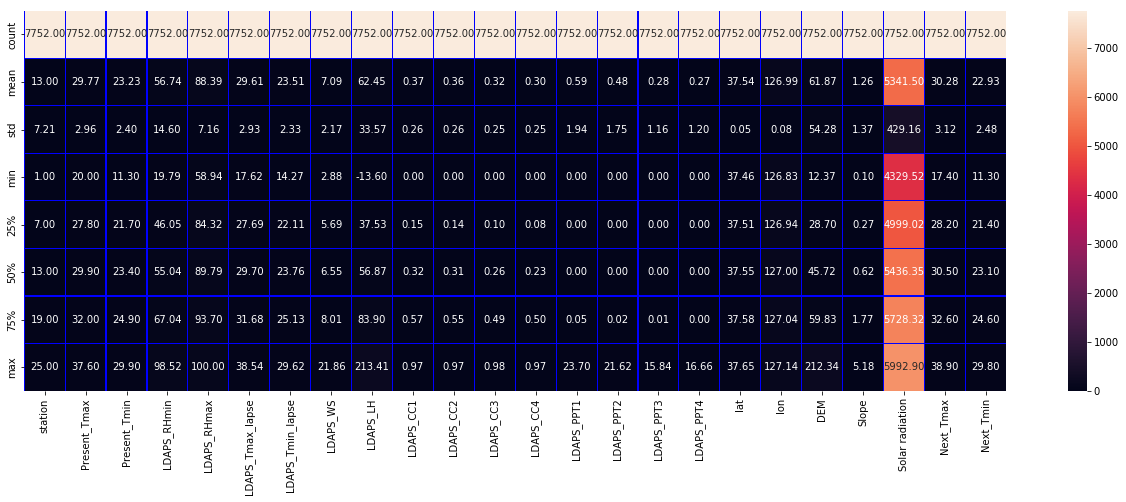

In [16]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observation:
    
The standard deviation of almost all columns in our dataset is not too high which means the data is not very widely scattered and is within the range, shows less chance of having skewness.

The standard deviation is too high only in the column Solar Radiation which means the data is very scattered in this column.

The values seem to be very high in the Solar Radiation column and reaches max at 5992.50. The values in the other columns are not so high.

Looking at the min and max values in the above graph, the data seems to be clean.



# Correlation of Columns with the Target Variable

In [19]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,...,-0.008247,-0.012458,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216
Present_Tmax,0.112582,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.101362,-0.122051,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.131525,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,0.064851,-0.049017,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066729,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.391110,0.240831,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166953,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069107,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.242113,-0.188133,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.104753,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.005275,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133339,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,0.006917,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.389771,0.169130,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732


The dataset contains both postive and negative correlations. Let's understand better by visualizing it.

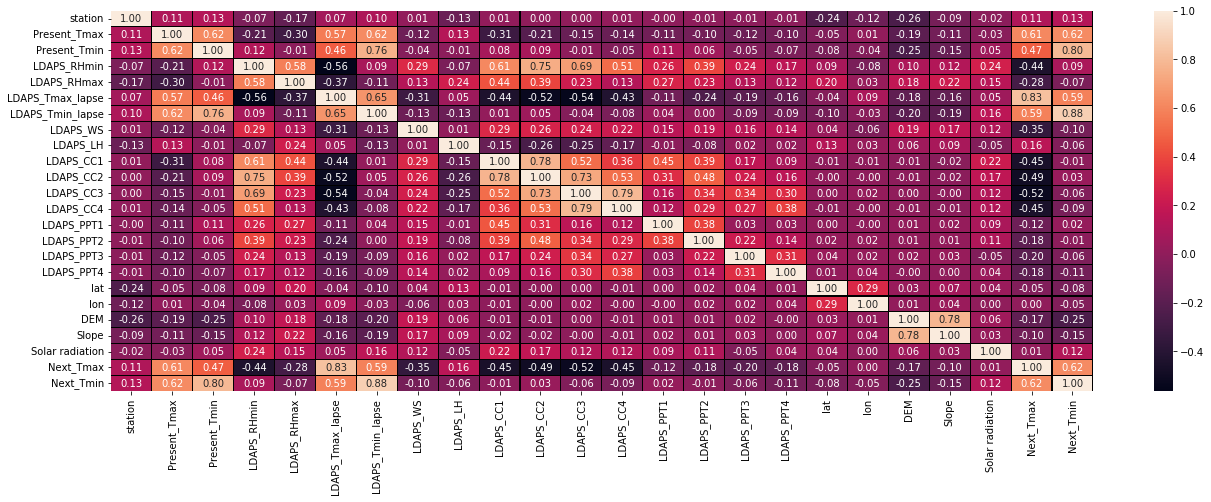

In [17]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
We can observe that both our target Variables are equally correlated to each other at 62%.

The Target variable Next_Tmax is most positively correlated with LDAPS_Tmax_lapse at 83% correlation.

The Target variable Next_Tmax is most negatively correlated with LDAPS_CC3 at 52%.

The Target variable Next_Tmin  is most positively correlated with LDAPS_Tmin_lapse at 88% correlation.

The Target variable Next_Tmin  is most negatively correlated with DEM at -25%.

Hence, the Target variables have good correlations with their input variables.

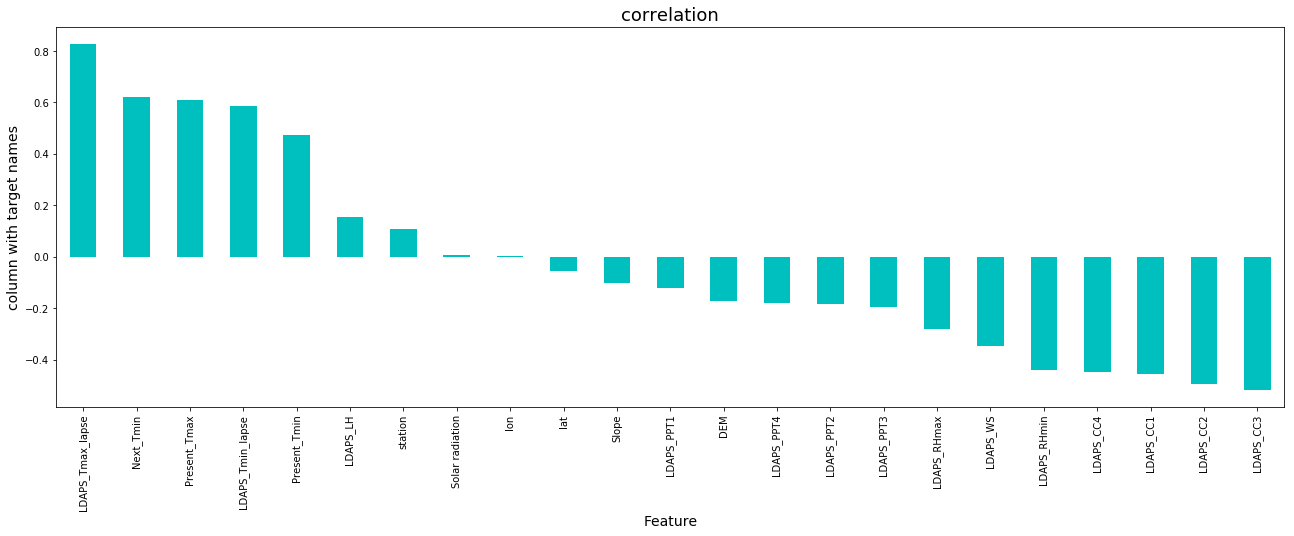

In [18]:
#Plotting Correlation in order with target variable Next_Tmax
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Correlations of Input variables with respect to the Target Variable Next_Tmax:

9 columns are positively correlated to the Target Variable Next_Tmax.

14 columns are negatively correlated to the Target Variable Next_Tmax.

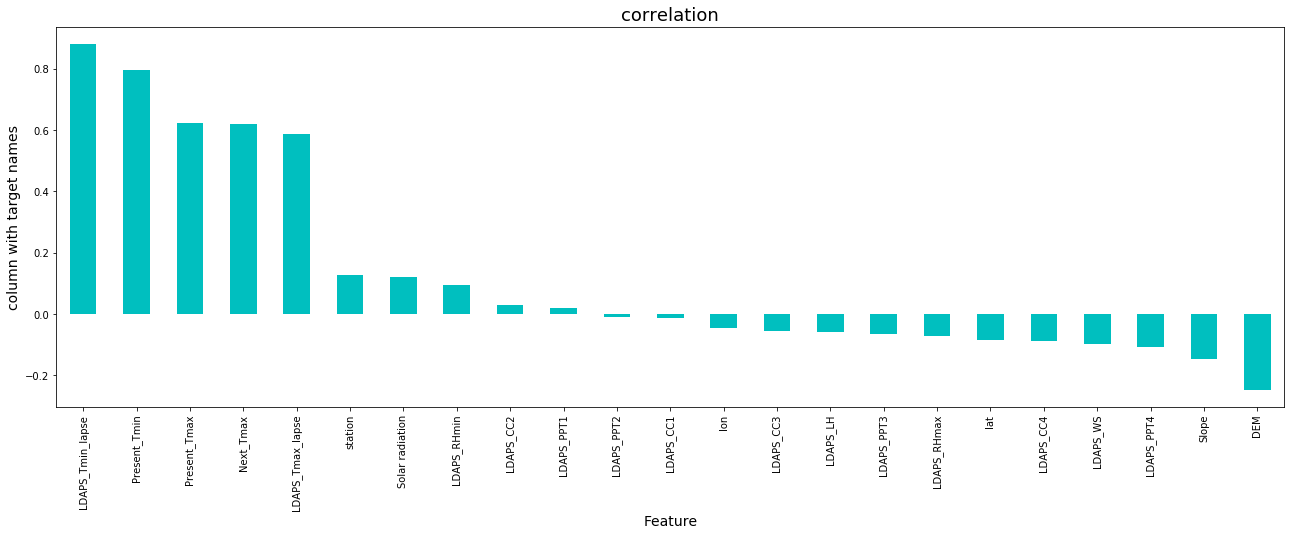

In [20]:
#Plotting Correlation in order with target variable Next_Tmin
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Correlations of Input variables with respect to the Target Variable  Next_Tmin:

12 columns are positively correlated to the Target Variable Next_Tmin.

11 columns are negatively correlated to the Target Variable  Next_Tmin.

# Checking skewness

In [21]:
df.skew()

station             0.000000
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see skewness in many columns.

The skewness is too high in columns like Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_WS, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM and Slope.

If the skewness is too high, then there might also be a possibilty of having outliers. Let's check outliers by doing Visualization.

# Checking Outliers


station                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Present_Tmax         AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Present_Tmin         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
LDAPS_RHmin          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
LDAPS_RHmax          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LDAPS_WS             AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
LDAPS_CC1           AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
LDAPS_CC2           AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
LDAPS_CC3           AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
LDAPS_CC4           AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
LDAPS_PPT1          AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
LDAPS_PPT2          AxesSubplot(0.

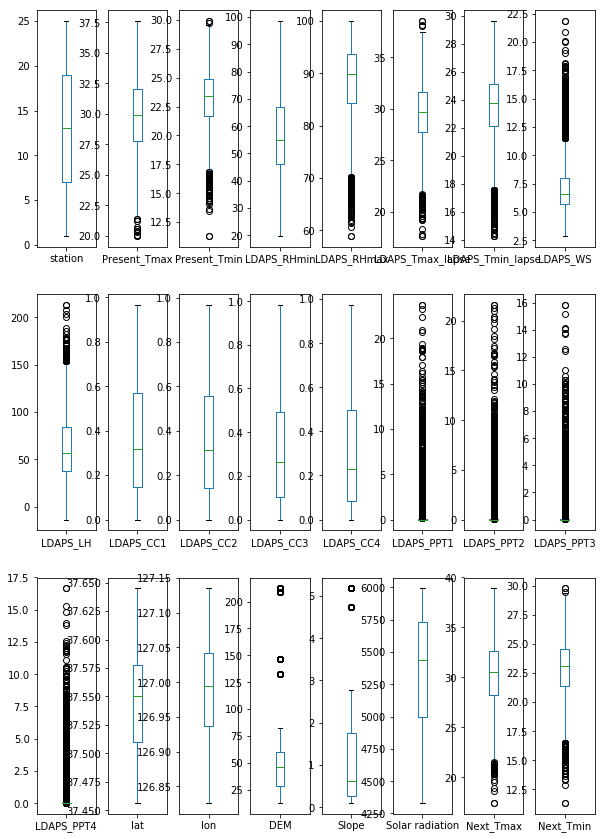

In [22]:
#Multivariate analysis to check outliers of all columns
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

 We have huge outliers in almost 12 columns. But since we could observe in our data description that our data is not much standard deviated, the min & max values weren't too high or low and is within the range. Hence, this data seems to be of huge importance to our dataset, so we don't remove these outliers as if we remove them we get a data loss of 12% which is huge Information Loss. So, we dont treat the outliers.

# Separating the column into x & y

In [25]:
#Creating x & y columns 
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=df['Next_Tmax']
y2=df['Next_Tmin']

Separating the columns into x, y1 and y2 where input featues as x and target variables as y1 & y2.

# Transforming Data to reduce Skewness

In [26]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
x=power_transform(x,method='yeo-johnson')
x

array([[-1.86035552, -0.40953245, -0.79855981, ...,  1.83497751,
         1.31415303,  1.8494304 ],
       [-1.64838475,  0.70462688, -0.72101794, ...,  0.05597899,
        -0.38533562,  1.40070208],
       [-1.4548483 ,  0.59515791, -0.02867622, ..., -0.36457492,
        -0.94916364,  1.38064953],
       ...,
       [ 1.54118849, -2.0495223 , -2.17942702, ..., -1.19312415,
        -0.93504362, -1.74476253],
       [ 0.0770875 , -2.84457064, -3.68295649, ..., -1.98514427,
        -1.47726373, -1.88707057],
       [ 0.0770875 ,  2.98237529,  3.23514087, ...,  1.83497751,
         1.74216318,  1.8494304 ]])

# Scaling Data using Min Max Scaler

In [27]:
#Importing libraries for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
#define min max scaler
mms=MinMaxScaler()
# transform data
ab=mms.fit_transform(df)
print(ab)

[[0.         0.49431818 0.54301075 ... 1.         0.54418605 0.53513514]
 [0.04166667 0.67613636 0.55376344 ... 0.92570319 0.60930233 0.60540541]
 [0.08333333 0.65909091 0.64516129 ... 0.92224225 0.6372093  0.68108108]
 ...
 [1.         0.18181818 0.32795699 ... 0.07323945 0.48372093 0.32972973]
 [0.5        0.         0.         ... 0.         0.         0.        ]
 [0.5        1.         1.         ... 1.         1.         1.        ]]


Hence, the data is Scaled.

# Model Building for Input variables x & Target Variable y1

In [29]:
#Importing libraries to build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Finding Max accuracy at the best random state for target variable y1
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y1_train)
    pred=lr.predict(x_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)

Best accuracy is  0.7887501820848615  on Random_state 160


We are getting 80% accuracy on random state 160. Hence, we select random state as 160.

In [31]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.20,random_state=160)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 160. We will use linear Regression to train our model as we have a continuous tye of Target Variable y1.

In [33]:
#Code for Linear Regression
lm=LinearRegression()
lm.fit(x_train,y1_train)
pred=lm.predict(x_test)

In [ ]:
#displaying predicted and actual values
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y1_test)

Let's check the Training accuracy and see how well we have trained our model.

In [34]:
#training score
lm.score(x_train,y1_train)

0.7538272986388506

We are obtaining 75.38% training accuracy for target variable y1 in our Model. Let's try finding errors.

In [35]:
#Finding Errors
print('error:')
print('Mean absolute error:',mean_absolute_error(y1_test,pred))
print('Mean squared error:',mean_squared_error(y1_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y1_test,pred)))

error:
Mean absolute error: 1.1287200159797293
Mean squared error: 2.190555606016449
Root Mean squared error: 1.4800525686665487


We can observe the error rate of our model to be very less. Let's check the accuracy score to check the performance of our model.

In [36]:
print(r2_score(y1_test,pred))

0.7887501820848615


We are obtaining our r2 score for target variable y1 as 80% which can also be due to overfitting or underfitting problems. Hence, we will use Cross Validation to train the model better.

# Model Building for Input variables x & Target Variable y2

In [37]:
#Finding Max accuracy at the best random state for target variable y1
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y2_train)
    pred=lr.predict(x_test)
    acc=r2_score(y2_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)

Best accuracy is  0.8474917995111501  on Random_state 42


We are getting 84.78% accuracy on random state 160. Hence, we select random state as 160.

In [38]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.20,random_state=160)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 160. We will use linear Regression to train our model as we have a continuous tye of Target Variable y2.

In [39]:
#Code for Linear Regression
lm=LinearRegression()
lm.fit(x_train,y2_train)
pred=lm.predict(x_test)

In [40]:
#displaying predicted and actual values
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y2_test)

Predicted Happiness Score:  [21.90789869 23.98720393 17.28425592 ... 20.73055361 19.97985133
 23.95733531]
actual Happiness Score:  Date
02-07-2017    21.5
08-07-2014    24.6
29-08-2016    17.0
28-08-2017    16.4
15-07-2016    19.6
08-07-2017    23.3
27-08-2014    20.7
23-08-2016    25.6
20-07-2015    24.0
05-07-2013    20.5
01-07-2017    22.2
27-07-2016    25.2
15-08-2015    21.3
20-07-2014    25.6
08-08-2016    26.9
18-08-2014    20.2
12-07-2017    24.0
04-08-2017    28.1
02-07-2014    20.9
06-08-2015    23.8
09-07-2017    22.5
19-08-2013    21.0
05-08-2016    27.4
30-06-2015    19.6
05-07-2015    20.4
13-08-2014    18.2
12-07-2013    21.7
26-07-2013    22.1
07-07-2017    23.0
22-07-2016    27.5
              ... 
18-08-2013    23.9
22-08-2016    26.9
05-08-2017    27.1
18-08-2013    25.9
11-07-2017    24.7
05-07-2015    20.7
21-07-2016    22.8
07-08-2015    24.2
21-08-2017    24.1
16-07-2015    18.4
29-07-2015    25.6
30-08-2017    17.2
19-08-2017    21.9
23-08-2017    23.1
30-08-20

Let's check the Training accuracy and see how well we have trained our model.

In [41]:
#training score
lm.score(x_train,y2_train)

0.8230499135553

We are obtaining 82.62% training accuracy for target variable y2 in our Model. Let's try finding errors.

In [42]:
#Finding Errors
print('error:')
print('Mean absolute error:',mean_absolute_error(y2_test,pred))
print('Mean squared error:',mean_squared_error(y2_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y2_test,pred)))

error:
Mean absolute error: 0.7791968997141991
Mean squared error: 1.0091325529541213
Root Mean squared error: 1.0045558983720724


We can observe the error rate of our model to be very less. Let's check the accuracy score to check the performance of our model.

In [43]:
print(r2_score(y2_test,pred))

0.8438167364298297


We are obtaining our r2 score for target variable y2 as 84.78% which can also be due to overfitting or underfitting problems. Hence, we will use Cross Validation to train the model better.

# Cross Validation of The Model for Target Variable y1

In [44]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=r2_score(y1_train,pred_train)
test_accuracy=r2_score(y1_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.6729223563255715 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 3 the cv score is 0.7096364773392573 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 4 the cv score is 0.6931185824231954 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 5 the cv score is 0.6906922603221065 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 6 the cv score is 0.691280261954093 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 7 the cv score is 0.6877152134951954 and r2 score for training is -5.2647145427666615 and accuracy for the testing is -4.875338244686439


At cross fold 8 the cv score is 0.6793167736476871 and r2 score for training is -5.

cv=3 gives us the best cv score at 71.64%. We use cv=3 for cross validation for Target variable y1.

Here we have handled the problem or overfitting and underfitting by checking the training and testing score. 

# Cross Validation of The Model for Target Variable y2

In [45]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=r2_score(y2_train,pred_train)
test_accuracy=r2_score(y2_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y2,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8023992391904151 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 3 the cv score is 0.7734452955039677 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 4 the cv score is 0.7832997214082305 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 5 the cv score is 0.77150475542152 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 6 the cv score is 0.7543756895633565 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 7 the cv score is 0.7618929153054383 and r2 score for training is 0.8227200511917464 and accuracy for the testing is 0.8455339663636564


At cross fold 8 the cv score is 0.7606454398097752 and r2 score for training is 0.82272005

cv=2 gives us the best cv score at 80.23%. We use cv=2 for cross validation for Target variable y2.

Here we have handled the problem or overfitting and underfitting by checking the training and testing score. Let's try checking if we are covering all the points to attain accuracy by Visualizing it.

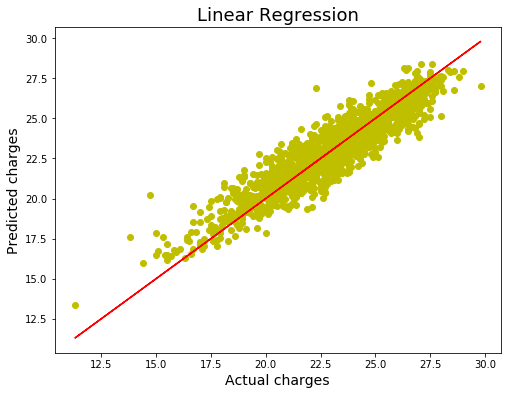

In [46]:
#Code for checking linear Regression points with target variale
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y2_test,y=pred_test,color='y')
plt.plot(y2_test,y2_test,color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The Best Fit line is covering almost all the datapoints of target variable y2 which shows good fit of our model.

# Regularization for Target Variable y1

In [47]:
#Importing Libraries for hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Using Lasso Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y1_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [49]:
#Code for Lasso Regression
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y1_train)
ls.score(x_train,y1_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y1_test,pred_ls)
lss

0.7887576801595348

The r2_score for target variable y1 that we get after using Lasso Regression is 78.88%

# Regularization for Target Variable y2

In [50]:
#Using Lasso Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y2_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [51]:
#Code for Lasso Regression
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y2_train)
ls.score(x_train,y2_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y2_test,pred_ls)
lss

0.8439011175857533

The r2_score for target variable y1 that we get after using Lasso Regression is 84.39%

# Ensemble Techniques for Target Variable y1

In [52]:
#Importing libraries and finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y1_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [53]:
#Performing RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y1_train)
rf.score(x_train,y1_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y1_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y1,cv=3)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  90.310970568765
Cross Val Score:  63.30753407864152


The r2 score & Cross Val Score after performing RandomForestRegressor is 89.98% & 66.24% respectively. 

# Ensemble Techniques for Target Variable y2

In [54]:
#Importing libraries and finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y2_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [55]:
#Performing RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y2_train)
rf.score(x_train,y2_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y2_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y2,cv=2)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  89.84456222202387
Cross Val Score:  77.45464797365557


The r2 score & Cross Val Score after performing RandomForestRegressor is 90.11% & 77.70% respectively.

# Saving Model

In [56]:
import pickle
filename='temperature.pkl'
pickle.dump(rf,open(filename,'wb'))